Para esta sesión usaremos una bbdd si un hogar comenzó a usar un nuevo pozo de agua subterranea o no. Esta bbdd surge de una iniciativa de gobierno para mitigar los riesgos asociados al arsénico. El agua por naturaleza está contaminada por arsenico

In [1]:
import warnings
warnings.filterwarnings('ignore')

#Librerias clasicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#importamos funciones externas de nuestro archivo auxiliar
import lec6_graphs as gfx

#importamos statsmodels para generar modelos de regresión
import statsmodels.api as sm
import statsmodels.formula.api as smf

#definimos parámetros de los gráficos
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)

# dataframe
df = pd.read_csv('wells.csv').drop('index', axis = 1)

In [2]:
df.shape

(3020, 5)

In [3]:
df.columns

Index(['y', 'dist100', 'arsenic', 'educ4', 'assoc'], dtype='object')

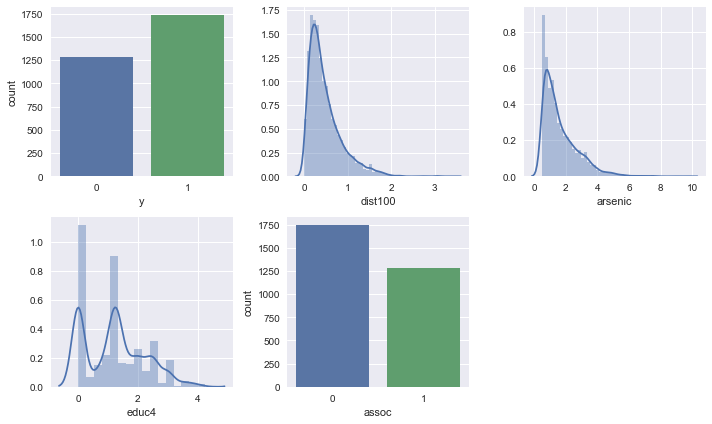

In [4]:
#Inspección gráfica de los elementos

for index, value in enumerate(df):
    plt.subplot(2,3, index + 1)
    if len(df[value].value_counts()) >2:
        sns.distplot(df[value])
    else: 
        sns.countplot(df[value])
    plt.tight_layout()

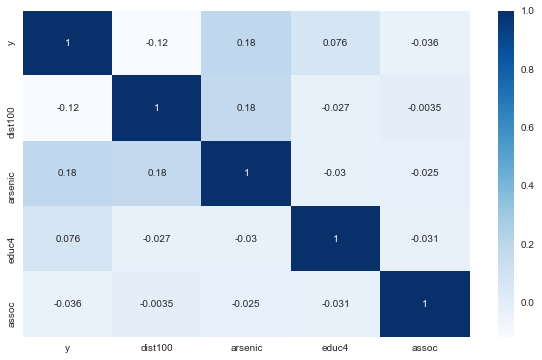

In [5]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True )

Observamos que las correlaciones son debiles. No hay asociación fuerte en las variables, esto es porque estamos usando la correlación de pearson. Esto no es un impedimento ya que hay correlaciones que no son estrictamente lineales

### Modelo de probabilidad lineal
- Con el modelo de regresión lineal se asume que la variable dependiente mide la probabilidad del suceso
- La interpretación de los coeficientes se hace en consideración a la probabilidad de ocurrencia del suceso

In [6]:
modelo1_ols = smf.ols( ' y ~ dist100', df).fit()
modelo1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     42.57
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           7.95e-11
Time:                        18:01:53   Log-Likelihood:                -2136.2
No. Observations:                3020   AIC:                             4276.
Df Residuals:                    3018   BIC:                             4288.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6484      0.014     45.194      0.000       0.620       0.677
dist100       -0.1515      0.023     -6.525      0.000      -0.197      -0.106
==============================================================================
Omnibus:                    11769.028   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              478.263
Skew:                          -0.305   Prob(JB):                    1.40e-104
Kurtosis:                       1.148   Cond. No.                         3.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
def concise_summary(mod, print_fit=True):
    """docstring for concise_summary"""
    fit = pd.DataFrame({'Statistics': mod.summary2().tables[0][2][2:], 'Value': mod.summary2().tables[0][3][2:]})
    estimates = mod.summary2().tables[1].loc[:, 'Coef.':'Std.Err.']
    if print_fit is True:
        print("\n\nGoodness of Fit statistics\n", fit)
    print("\n\nPoint estimates\n\n", estimates)

In [20]:
concise_summary(modelo1_ols)



Goodness of Fit statistics
             Statistics      Value
2                 BIC:  4288.4686
3      Log-Likelihood:    -2136.2
4         F-statistic:      42.57
5  Prob (F-statistic):   7.95e-11
6               Scale:    0.24111


Point estimates

               Coef.  Std.Err.
Intercept  0.648407  0.014347
dist100   -0.151539  0.023225


Nuestra función muestra lo siguiente:
intercepto : Cuando la distancia es cero.. ejemplo una familia que esté a cero distancia de un pozo tiene una probabilidad de 64% de cambiarse... esto no devuelve la significancia estadistica
Para intercepto/error estandar --> nivel de significancia estadistica nominal 

La distancia se puede interpretar como la diferencia entre 2 individuos con similar estadistica, pero que difieren en 100 metros de distancia de un pozo seguro 

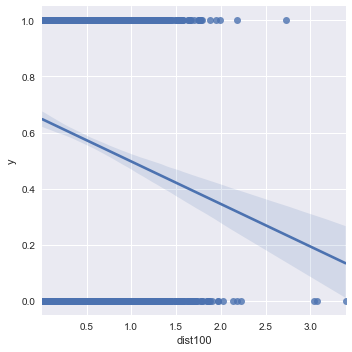

In [21]:
sns.lmplot( 'dist100', 'y', df)

Visualizamos la recta, se demuestra que la medida en que la distancia aumenta, la probabilizad de aumentar la distancia disminuye.

### Limitantes del Modelo de Probabilidad Lineal
- El modelo LMP presenta fallas en la estimación_
    - Los parámetros estimados pueden tomar valores mayor a uno y menos que cero
    - Los errores no siguen una distribución normal
    - La forma funcional lineal restringe las nolinealidades en los extremos de la muestra

### Introducción a la regresión logistica
- La regresión logistica permite generar estimaciones mediante el metodo de maxima verosimilitud
- Objetivo: Desarrollar modelo predictivo para la probabilidad de ocurrencia 
- El modelo sigue siendo lineal en los parametros, la diferencia es que se parametriza la variable independiente 
- La variable independiente es el logaritmo de la razon entre la probabilidad de suceso y la probabilidad de fracaso del evento
- Eso da una curva que se conoce como sigmoide 

In [22]:
modelo1_logit = smf.logit( ' y ~ dist100', df).fit()
concise_summary(modelo1_logit)

Optimization terminated successfully.
         Current function value: 0.674874
         Iterations 4


Goodness of Fit statistics
         Statistics       Value
2             BIC:   4092.2639
3  Log-Likelihood:     -2038.1
4         LL-Null:     -2059.0
5     LLR p-value:  9.7978e-11
6           Scale:      1.0000
7                             


Point estimates

               Coef.  Std.Err.
Intercept  0.605959  0.060310
dist100   -0.621882  0.097426


In [23]:
modelo1_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3020
Model:                          Logit   Df Residuals:                     3018
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:                 0.01017
Time:                        18:03:40   Log-Likelihood:                -2038.1
converged:                       True   LL-Null:                       -2059.0
Covariance Type:            nonrobust   LLR p-value:                 9.798e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6060      0.060     10.047      0.000       0.488       0.724
dist100       -0.6219      0.097     -6.383      0.000      -0.813      -0.431
==============================================================================
"""

Buscamos la probabilidad de cambiarse de pozo para la distancia media de la muestra:

In [24]:
dist100_mean = np.mean(df['dist100'])

estimate_y = modelo1_logit.params['Intercept'] + (modelo1_logit.params['dist100']*dist100_mean)
estimate_y

0.3053922392515757

In [25]:
def invlogit(x):
    return 1/(1+ np.exp(-x))
invlogit(estimate_y)

0.5757601624040816

La probabilidad promedio de cambiarse de pozo cuando tenemos una distancia más común (la media) respecto a un pozo de agua segura es un 57,5%

### Efecto diferencial del modelo logístico
Hasta el momento podemos obtener una probailidad puntual. Pero tambien se puede contrastar dos puntos específicos 
- Para evaluar la contribución de X en la probabilidad de ocurrencia se realiza lo siguiente:
    - Evaluar la probabilidad de los puntos que queremos comparar
    - Diferencia entre probabilidad

In [26]:
def estimate_y_logit(x):
    estimate_y = modelo1_logit.params['Intercept'] + (modelo1_logit.params['dist100']*x)
    return estimate_y

In [27]:
pr_dist_100 = invlogit(estimate_y_logit(1))
pr_dist_200 = invlogit(estimate_y_logit(2))
pr_dist_300 = invlogit(estimate_y_logit(3))
pr_dist_400 = invlogit(estimate_y_logit(4))
print( pr_dist_100,pr_dist_200, pr_dist_300, pr_dist_400)

0.4960194411878717 0.3457430029920142 0.22102787555555542 0.13220883169891437


In [28]:
print( 'probabilidad entre 100 y 200 es:', pr_dist_100 - pr_dist_200)
print( 'probabilidad entre 200 y 300 es:', pr_dist_200 - pr_dist_300)
print( 'probabilidad entre 300 y 400 es:', pr_dist_300 - pr_dist_400)

probabilidad entre 100 y 200 es: 0.1502764381958575
probabilidad entre 200 y 300 es: 0.1247151274364588
probabilidad entre 300 y 400 es: 0.08881904385664105


De acuerdo al analisis de ols, habiamos dicho que la diferencia cuando la distancia es 100 metros de un pozo era 0,15 ... al realizar el modelo con logit vemos que se dá solo en el caso de las distancias 100 y 200, pero cuando comparamos otras distancias que poseen la misma diferencia .. el diferencia cambia, por lo que el comportamiento no es lineal

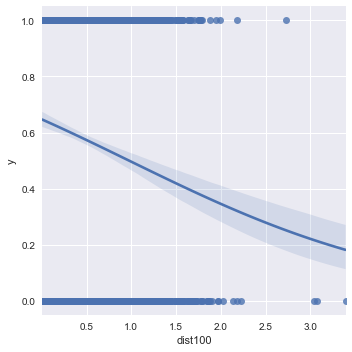

In [29]:
sns.lmplot('dist100', 'y',df, logistic = True)

### Punto equidistante de probabilidad
|Se puede inferir en que puntaje de x nos encontramos con que sea igual de probable. Es decir, el valor de x para que la probabilidad de ocurrencia de 1 o 0 sean igual


### Relación entre LPM y Logit
Si tomamos los logot de los modelos logisticos y lo dividimos por 4 obtenemos un intervalo superior en la contribución de la variable independiente y dependiente, este punto es una aproximación la curva logistica donde las probabilidades son cercanas a .5

In [30]:
print('\nOLS - LMP')
concise_summary(modelo1_ols, print_fit= False)
print('\nLogits') 
concise_summary(modelo1_logit, print_fit= False)


OLS - LMP


Point estimates

               Coef.  Std.Err.
Intercept  0.648407  0.014347
dist100   -0.151539  0.023225

Logits


Point estimates

               Coef.  Std.Err.
Intercept  0.605959  0.060310
dist100   -0.621882  0.097426


In [33]:
#Dividir logits de la dist100 en 4 
-0.62188/4

-0.15547

#Obtenemos la máxima diferencia contribuida por x en cambiarse de poso, coincide en el coeficiente de LPM
#Si no es la manera seria de presentar los elementos, podemos determinar el máximo efecto del cambio de la probabilidad podemos aproximarnos al máximo cambio de la probabilidad, sirve para la mayoria de las pendientes pero no para el intercepto

### Clasificación desde Machine Learning 
El problema de usar machine learning es enseñarle a la maquina a discriminar entre un número finito de clases en base a una serie de atributos. El objetivo es realizar predicciones en base a la función candidata que presente mejor desempeño
Ahora se busca aumentar la tasa de clases predichas correctamentes (antes se usaba el R2)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Declaramos los objetos
#Ingresamos las variables que estamos buscando
#Declaramos variable depedndiente o vector objetivo
#Asignamos tamaño de test
#Asignamos randmon seed
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,'dist100':'assoc'], df['y'],
                                                   test_size= 0.33, random_state = 11238)

In [37]:
#Estandarizamos las matrices
#con fit_tranform ejecuta dos pasos: Estimar los puntos y generar y export a una mariz valida
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [38]:
#modelo default con la clase logistickregression
default_model = LogisticRegression().fit(X_train_std, y_train)

In [39]:
#coeficiente de cada uno de los parametros que afecta las condiciones
default_model.coef_

array([[-0.33266754,  0.5907759 ,  0.14256382, -0.05195545]])

In [41]:
default_model.intercept_

array([0.34205736])

## Metricas de desempeño para problemas de clasificación

Generamos la prediccion del modelo generado

In [46]:
yhat = default_model.predict(X_test_std)
yhat[:20]

#Tengo la probabilidad de clase cero y clase uno 


array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
      dtype=int64)

### Matriz de confusión y exactitud predictiva

In [47]:
from sklearn.metrics import confusion_matrix

modelo1_confusion = confusion_matrix(y_test, yhat)
modelo1_confusion

array([[171, 251],
       [117, 458]], dtype=int64)

Es un cruce entre ambas etiquetas, podemos observar las categorias predichas vs las observadas
La diagonal principal se puede ver los casos predichos exitosamente vs total de casos (171 casos predichos exitosamente por sobre 458 casos)
esta medida se conoce como exactitud

In [51]:
#Usamos accuracy (exactitud) función para determinar exactitud
from sklearn.metrics import accuracy_score
modelo1_acc = accuracy_score(y_test, yhat)
modelo1_acc
#el resultado nos dice que el modelo tiene una exactitud promedio de un 63% frente al caso de identificar aleatoriamente una observación correcta
#En este caso, como tenemos 2 categorias nuestro clasificador aleatorio es 0.5 .

0.6308926780341023

In [52]:
#En este caso, como tenemos 2 categorias nuestro clasificador aleatorio es 0.5 .
#El modelo tiene un desempeño 13% superior que un clasificador aleatorio
modelo1_acc - 0.5


0.13089267803410232

### accuracy, precision, recall y f1
La medida de exactitud por si misma es engañosa, dado que no hace distinción frente a los tipos de errores (falsos positivios, falsos negativos)
Se usará dos medidas adicionales


In [54]:
from sklearn.metrics import precision_score
modelo1_prec = precision_score(y_test, yhat)
modelo1_prec
#Hay una precisión del modelo de un 64% que un clasificador aleatorio de identificar correctamente las etiquetas

0.6459802538787024

In [56]:
from sklearn.metrics import recall_score
modelo1_recall = recall_score(y_test, yhat)
modelo1_recall
#Con esto sabemos que proporcion de positivos reales se identificó correctamente
#el modelo tiene un muy buen desempeño de identificar los correctos positivos
#entre precision y recall existe un trueque con f1 que representa la media armonica

0.7965217391304348

In [58]:
from sklearn.metrics import f1_score
modelo1_fscore = f1_score(y_test, yhat)
modelo1_fscore
#f1 es bueno cuando recall y precision son altos 

0.7133956386292836

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.59      0.41      0.48       422
           1       0.65      0.80      0.71       575

    accuracy                           0.63       997
   macro avg       0.62      0.60      0.60       997
weighted avg       0.62      0.63      0.62       997



### Curva Receiving Operator Characteristics
con las metricas anteriores logramos caracterizar las tasas exitosas del modelo. Existen errores que dan a falso positivo o falso negativo
Un buen modelo de clasificación debe considerar el rango de error, para ello se usa la curva ROC 

In [62]:
from sklearn.metrics import roc_curve

yhat_pr = default_model.predict_proba(X_test)[:, 1]

false_positive, true_positive, threshold = roc_curve(y_test, yhat_pr)

Text(0.5, 0, 'Falsos positivos')

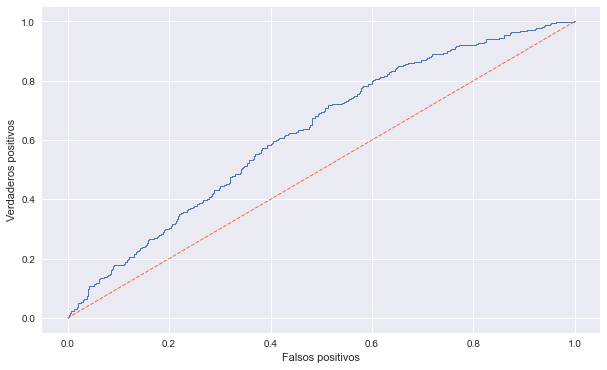

In [65]:
plt.plot(false_positive, true_positive, lw=1)
#bisectruz, cual es el comportamiento de un clasificador aleatorio
plt.plot([0,1], linestyle = '--', lw = 1, color = 'tomato')
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos positivos')

In [67]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, yhat_pr)
#nos dice que el ROC es un 62% (area bajo la curva) se contrasta con el clasificador aleatorio
#nuestra curva es superior a nuestro clasificador aleatorio

0.6266927673603957

### Validación cruzada en Machine Learning
El error de validación es el costo del metodo
No siempre tendremos el numero de muestras suficientes para validar 
Podemos iterar de forma sucesiva simulando el entrenamiento del modelo en multiples muestras

K-fold cross validation
es la segmentación de muestra de tamaño similar K veces ... es validación cruzada repetida K veces donde K es la cantidad de segmentaciones.

Entrenaremos un modelo con todas las muestras, se va a predecir y estimar una metrica, luego se agrega una segunda iteración, se extrae un subconjunto distinto k veces

In [80]:
from sklearn.model_selection import cross_val_score

m1_cv = cross_val_score(LogisticRegression(),
               X= df.loc[:, 'dist100':'assoc'],
               y= df['y'],
               cv=3,
               scoring = 'f1')

#El modelo resume todo el comportamiento

In [82]:
np.mean(m1_cv)

0.6981454809840354

In [83]:
np.std(m1_cv)

0.006821749533435546

### Leave One Out Cross Validation
